In [84]:
import numpy as np
import scipy as cp
import matplotlib.pyplot as plt
import cv2

(958, 1875, 3)


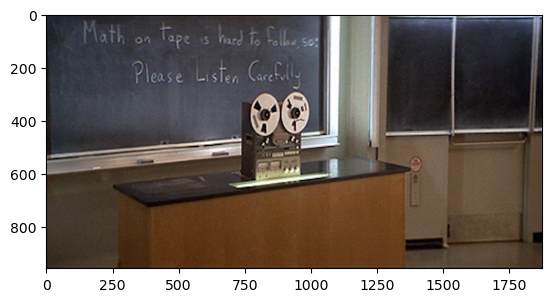

In [85]:
A = plt.imread("recorder.jpg")
fig, ax = plt.subplots()
print(A.shape)
ax.imshow(A)

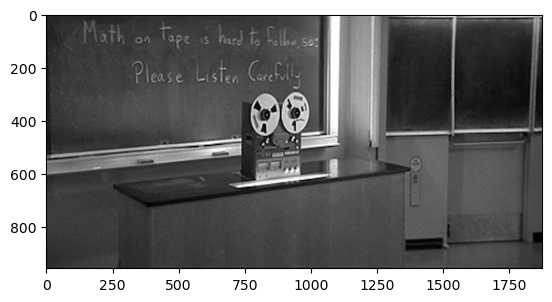

In [86]:
# Convert to grayscale

def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.299, 0.587, 0.114])

Abw = rgb2gray(A)
nx, ny = Abw.shape
plt.imshow(Abw, cmap=plt.get_cmap('gray'))

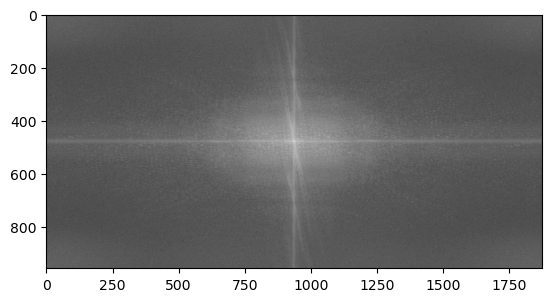

In [87]:
# FFT
At = np.fft.fft2(Abw)
F = np.log(np.abs(np.fft.fftshift(At)) + 1)
F = np.double(F)
out = np.zeros(F.shape, np.double)
F = cv2.normalize(F, out, 1.0, 0.0, cv2.NORM_MINMAX)
plt.imshow(F,cmap=plt.get_cmap('gray'))

In [88]:
def compress(A, percent):
    # grayscale
    Abw = rgb2gray(A)
    # FFT
    At = np.fft.fft2(Abw)
    # Some percent of fft
    At_flat = np.abs(At).flatten()
    At_flat[::-1].sort()
    border = At_flat[int(len(At_flat)*(percent/100))]
    ind = np.abs(At) >= border
    Atlow = At * ind
    # Inverse
    Alow = np.uint8(np.fft.ifft2(Atlow))
    # L2 of error
    l2_error_im = np.linalg.norm(Abw - Alow)/np.linalg.norm(Abw)
    l2_error_fft = np.linalg.norm(At - Atlow)/np.linalg.norm(At)
    return Alow, l2_error_im, l2_error_fft

C:\Temp\ipykernel_8984\3929217835.py:13: ComplexWarning: Casting complex values to real discards the imaginary part
  Alow = np.uint8(np.fft.ifft2(Atlow))


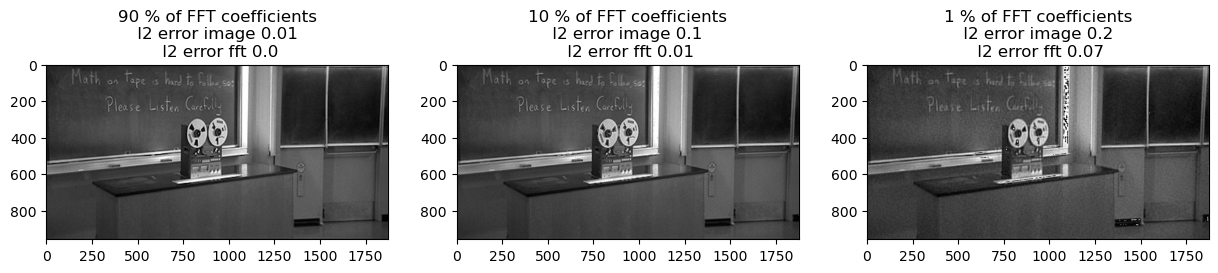

In [89]:
percents = [90, 10, 1]
fig,ax= plt.subplots(1,len(percents))
fig.set_size_inches(15,15)
compressed = []

for i, percent in enumerate(percents):
    Alow, l2_error_im, l2_error_fft = compress(A, percent)
    ax[i].imshow(Alow,cmap=plt.get_cmap('gray'))
    ax[i].set_title("{} % of FFT coefficients\n l2 error image {} \n l2 error fft {}".format(percent,round(l2_error_im, 2),round(l2_error_fft,2)))